In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.lenses import lens_util
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

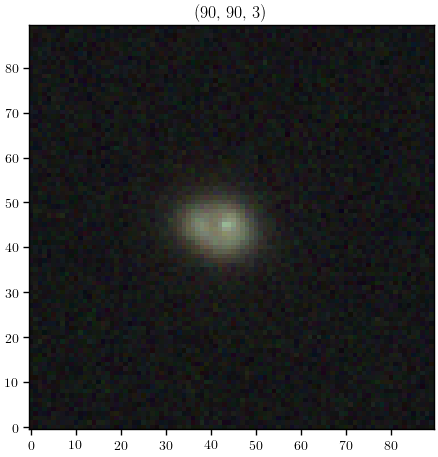

In [2]:
color_dir = config.machine.dir_05
pickle_dir = config.machine.dir_03

lens, rgb_model, rgb_image = lens_util.get_sample(pickle_dir, color_dir, 183)

plt.imshow(rgb_image)
plt.title(rgb_image.shape)
plt.show()

In [3]:
print(f'Stellar mass: {lens.lens_mass:.2e} Msun')

Stellar mass: 2.05e+11 Msun


In [7]:
log_m_total_10 = (1 / 0.80) * (np.log10(lens.lens_mass / 1e10) - 0.36)
m_total = np.power(10, log_m_total_10) * 1e10 * (100 / 32)
print(f'Total mass: {m_total:.2e} Msun')

Total mass: 4.82e+11 Msun
